In [1]:
import mne
from scipy.io import loadmat
import numpy as np

In [66]:
def file_to_data(fileName):
    chnames = ['Fp1','Fp2','Fc5','Fz','Fc6','T7','Cz','T8','P7','P3','Pz','P4','P8','O1','Oz','O2','stim']
    chtypes = ['eeg'] * 16 + ['stim']
    info = mne.create_info(ch_names=chnames, sfreq=512,ch_types=chtypes, montage='standard_1020',verbose=False)
    data = loadmat(fileName)["SIGNAL"]
    #On modifie pour avoir un dataset avec 1 : yeux ouvert et -1 yeux fermée
    new_data=[]
    timeStamp=[]
    yeux_ouvert=False
    nbEtat=0
    for k in range(len(data)):
        if(yeux_ouvert==False):
            tmp=np.append(data[k][1:17],-1)
        else:
            tmp=np.append(data[k][1:17],1)
        timeStamp.append(data[k][0])
        new_data.append(tmp)
        if(data[k][17]==1):
            nbEtat+=1
            yeux_ouvert=True
        if(data[k][18]==1):
            nbEtat+=1
            yeux_ouvert=False
    labels= [d[16] for d in new_data]
    donnees = [d[:16] for d in new_data]
    return donnees,labels,timeStamp,nbEtat

In [67]:
donnees,labels,timeStamp,nbEtat = file_to_data("data/subject_01.mat")

In [68]:
print(timeStamp[-1]/60)
print(len(donnees))
print(len(donnees)/timeStamp[-1])
print(nbEtat)

3.899967448
119808
512.0042735290031
10


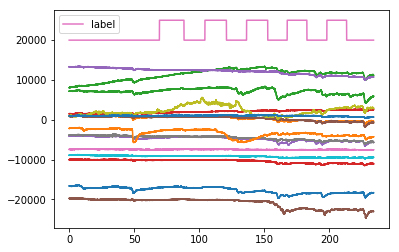

In [69]:
import matplotlib.pyplot as plt
plt.plot(timeStamp,donnees)
new_lab=[]
for l in labels:
    if(l==1):
        new_lab.append(25000)
    else:
        new_lab.append(20000)
plt.plot(timeStamp,new_lab,label="label")
plt.legend()
plt.show()

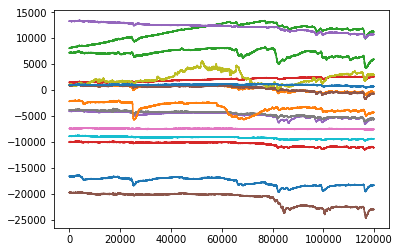

In [61]:
plt.plot(donnees)
plt.show()